# Linear Classification And Stochastic Gradient Descent

0.780603157054235 0.8070757324488668 0.8065843621399177 0.8054787789447823 0.8059087279651127


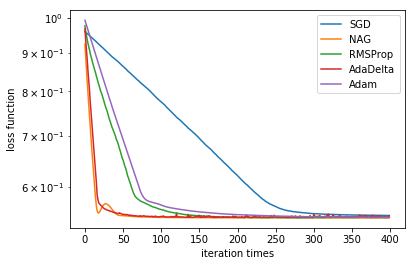

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import random
#读取数据集
X_train,y_train = ds.load_svmlight_file("D:/traindata/a9a.txt")
X_test,y_test = ds.load_svmlight_file("D:/traindata/a9a.t.txt",n_features=123)
X_train = X_train.toarray()
r_train = X_train.shape[0]
X_test = X_test.toarray()
r_test = X_test.shape[0]
B_train = np.ones([r_train,])
X_train = np.c_[X_train,B_train]
B_test = np.ones([r_test,])
X_test = np.c_[X_test,B_test]

#参数全零初始化
W = np.zeros([124,])
W1 = np.zeros([124,])
W2 = np.zeros([124,])
W3 = np.zeros([124,])
W4 = np.zeros([124,])
#NAG参数
v = 0
#RMSProp参数
G1 = 0
#AdaDelta参数
delta = 0
G2 = 0
#Adam参数
m = 0
G3 = 0
#学习率
lr = 0.02
#迭代次数
t = 400
#阈值
value = -0.825
#储存迭代中loss值
L_SGD = np.zeros([t])
L_NAG = np.zeros([t])
L_RMSProp = np.zeros([t])
L_AdaDelta = np.zeros([t])
L_Adam = np.zeros([t])
for n in range(t):
    #训练集中使用的样本
    n_train = [random.randint(0,r_train-1) for _ in range(128)]
    
    #梯度初始化
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(W.T.dot(X_train[i])) >= 0:
            g = g + W - X_train[i]*y_train[i]
        else:
            g = g + W
    #取平均值
    g = g/len(n_train)
    #批量梯度下降
    W = W - lr*g
    sum_test = 0
    #命中数
    hit = 0
    for i in range(r_test):
        sum_test += max(0,1-y_test[i]*W.T.dot(X_test[i]))
        if (W.dot(X_test[i]) >= value and y_test[i] == 1) or (W.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_SGD = hit/r_test
    #计算miniBatch loss
    L_SGD[n] = 0.5*W.T.dot(W) + 1/r_test*sum_test
    
    #NAG参数
    mu = 0.9
    #NAG
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(W1.T.dot(X_train[i])) >= 0:
            g = g + W1 - X_train[i]*y_train[i]
        else:
            g = g + W1
    #取平均值
    g = g/len(n_train)
    v_pre = v
    v = mu*v - lr*g
    W1 = W1 - mu*v_pre + (1+mu)*v
    sum_test = 0
    #命中数
    hit = 0
    for i in range(r_test):
        sum_test += max(0,1-y_test[i]*W1.T.dot(X_test[i]))
        if (W1.dot(X_test[i]) >= value and y_test[i] == 1) or (W1.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_NAG = hit/r_test
    #计算NAG loss
    L_NAG[n] = 0.5*W1.T.dot(W1) + 1/r_test*sum_test
    
    #RMSProp参数
    dr = 0.9
    eps = 1e-8
    lr = 0.001
    #RMSProp
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(W2.T.dot(X_train[i])) >= 0:
            g = g + W2 - X_train[i]*y_train[i]
        else:
            g = g + W2
    #取平均值
    g = g/len(n_train)
    G1 = dr*G1 + (1-dr)*g*g
    W2 = W2 - lr*g/np.sqrt(G1+eps)
    sum_test = 0
    #命中数
    hit = 0
    for i in range(r_test):
        sum_test += max(0,1-y_test[i]*W2.T.dot(X_test[i]))
        if (W2.dot(X_test[i]) >= value and y_test[i] == 1) or (W2.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_RMSProp = hit/r_test
    #计算RMSProp loss
    L_RMSProp[n] = 0.5*W2.T.dot(W2) + 1/r_test*sum_test
    
    #AdaDelta参数
    dr = 0.95
    eps = 1e-6
    #AdaDelta
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(W3.T.dot(X_train[i])) >= 0:
            g = g + W3 - X_train[i]*y_train[i]
        else:
            g = g + W3
    #取平均值
    g = g/len(n_train)
    G2 = dr*G2 + (1-dr)*g*g
    deltaW = -np.sqrt((delta+eps)/(G2+eps))*g
    W3 = W3 + deltaW
    delta = dr*delta + (1-dr)*deltaW*deltaW
    sum_test = 0
    #命中数
    hit = 0
    for i in range(r_test):
        sum_test += max(0,1-y_test[i]*W3.T.dot(X_test[i]))
        if (W3.dot(X_test[i]) >= value and y_test[i] == 1) or (W3.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_AdaDelta = hit/r_test
    #计算AdaDelta loss
    L_AdaDelta[n] = 0.5*W3.T.dot(W3) + 1/r_test*sum_test
    
    #Adam参数
    dr = 0.999
    beta = 0.9
    eps = 1e-8
    #Adam
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        if 1-y_train[i]*(W4.T.dot(X_train[i])) >= 0:
            g = g + W4 - X_train[i]*y_train[i]
        else:
            g = g + W4
    #取平均值
    g = g/len(n_train)
    m = beta*m + (1-beta)*g
    G3 = dr*G3 + (1-dr)*g*g
    alpha = lr*np.sqrt(1-dr**(n+1))/(1-beta**(n+1))
    W4 = W4 - alpha*m/np.sqrt(G3+eps)
    sum_test = 0
    #命中数
    hit = 0
    for i in range(r_test):
        sum_test += max(0,1-y_test[i]*W4.T.dot(X_test[i]))
        if (W4.dot(X_test[i]) >= value and y_test[i] == 1) or (W4.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_Adam = hit/r_test
    #计算Adam loss
    L_Adam[n] = 0.5*W4.T.dot(W4) + 1/r_test*sum_test
    
#制图
n = np.arange(t)
plt.plot(n,L_SGD[n],label='SGD')
plt.plot(n,L_NAG[n],label='NAG')
plt.plot(n,L_RMSProp[n],label='RMSProp')
plt.plot(n,L_AdaDelta[n],label='AdaDelta')
plt.plot(n,L_Adam[n],label='Adam')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('iteration times')
plt.ylabel('loss function')
#打印准确率
print(accuracy_SGD,accuracy_NAG,accuracy_RMSProp,accuracy_AdaDelta,accuracy_Adam)